In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# function that goes into the folders in my Mac, reads the csv files for each situtation, and 
# creates a data frame for this situations

def dfMaker(folderName, subFolderName):

    for folder in ['/test/', '/train/']:
        path = '/Users/Mehul/mit/'+folderName + '/' + subFolderName + folder
        
        li = []

        for file in os.listdir(path):
            filename = os.fsdecode(file)
            filepath = path + filename
            df = pd.read_csv(filepath, index_col = None, header =0)
            
            # adding a column to the dataframe that has '1' if the scanner was more than 6ft away from advertiser 
            # and '0' if the scanner was less than 6ft away from advertiser
            if "in6" in filename:
                df["SAFE"] = 0
            elif "out6" in filename:
                df["SAFE"] = 1

            li.append(df)

    return pd.concat(li, axis=0, ignore_index=True)


In [3]:
inHouseBackpack = dfMaker('inHouse', 'backpack')
inHouseHand = dfMaker('inHouse', 'noWalls')
inParkBackpack = dfMaker('inPark', 'backpack')
inParkHand = dfMaker('inPark', 'noObs')

# filtering this dataset since scanner didn't filter the bluetooth devices
inParkHand = inParkHand[inParkHand.ADDRESS == "DC:A6:32:2C:42:BC"]

## Data Visualization

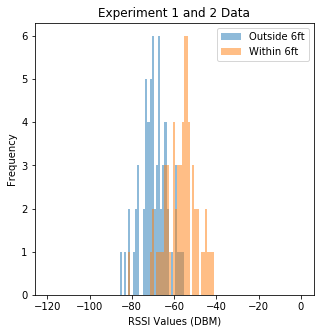

In [4]:
# Situation 1 Histogram

bins = np.linspace(-120, 0, 120)
plt.figure(figsize = (5,5))
plt.hist(inParkHand.loc[inParkHand['SAFE']==1,'RSSI'] , bins, alpha=0.5, label='Outside 6ft')
plt.hist(inParkHand.loc[inParkHand['SAFE']==0,'RSSI'], bins, alpha=0.5, label='Within 6ft')
plt.title("Experiment 1 and 2 Data")
plt.xlabel("RSSI Values (DBM)")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

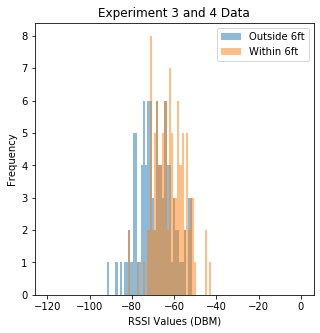

In [5]:
# Situation 2 Histogram

bins = np.linspace(-120, 0, 120)
plt.figure(figsize = (5,5))
plt.hist(inParkBackpack.loc[inParkBackpack['SAFE']==1,'RSSI'] , bins, alpha=0.5, label='Outside 6ft')
plt.hist(inParkBackpack.loc[inParkBackpack['SAFE']==0,'RSSI'], bins, alpha=0.5, label='Within 6ft')
plt.title("Experiment 3 and 4 Data")
plt.xlabel("RSSI Values (DBM)")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

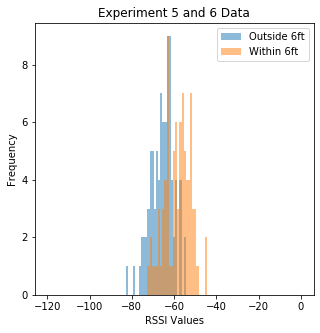

In [6]:
# Situation 3 Histogram

plt.figure(figsize = (5,5))
plt.hist(inHouseHand.loc[inHouseHand['SAFE']==1,'RSSI'] , bins, alpha=0.5, label='Outside 6ft')
plt.hist(inHouseHand.loc[inHouseHand['SAFE']==0,'RSSI'], bins, alpha=0.5, label='Within 6ft')
plt.title("Experiment 5 and 6 Data")
plt.xlabel("RSSI Values")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

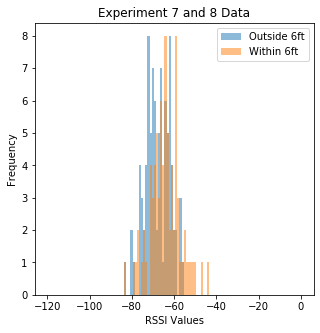

In [7]:
# Situation 4 Histogram

plt.figure(figsize = (5,5))
plt.hist(inHouseBackpack.loc[inHouseBackpack['SAFE']==1,'RSSI'] , bins, alpha=0.5, label='Outside 6ft')
plt.hist(inHouseBackpack.loc[inHouseBackpack['SAFE']==0,'RSSI'], bins, alpha=0.5, label='Within 6ft')
plt.title("Experiment 7 and 8 Data")
plt.xlabel("RSSI Values")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

## T-tests for data

In [8]:
from scipy.stats import ttest_ind

In [9]:
# function for t-tests

def t_test(dataset1, dataset2):
    rssi1 = dataset1["RSSI"]
    rssi2 = dataset2["RSSI"]

    print (f"P-value: {ttest_ind(rssi2, rssi1)[1]}")

In [10]:
# p-value for situation 1 and situation 2

t_test(inParkHand,inParkBackpack)

P-value: 0.01767732920300352


In [11]:
# p-value for situation 1 and situation 3

t_test(inParkHand, inHouseHand)

P-value: 0.311691279899278


In [12]:
# p-value for situation 1 and situation 4

t_test(inParkHand, inHouseBackpack)

P-value: 0.001931557932388529


In [13]:
# p-value for situation 2 and situation 3

t_test(inParkBackpack, inHouseHand)

P-value: 3.582257539006576e-05


In [14]:
# p-value for situation 2 and situation 4

t_test(inParkBackpack, inHouseBackpack)

P-value: 0.5269444928211322


In [15]:
# p-value for situation 3 and situation 4

t_test(inHouseHand, inHouseBackpack)

P-value: 1.5529658420800532e-07
